# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import math
data = pd.read_csv("/datasets/real_estate_data.csv",sep='\t')

In [2]:
#информации о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
#ознакомление
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Проверим наличие явных дубликатов

In [4]:
# смотрим наличие явных дубликатов
data.duplicated().sum()

0

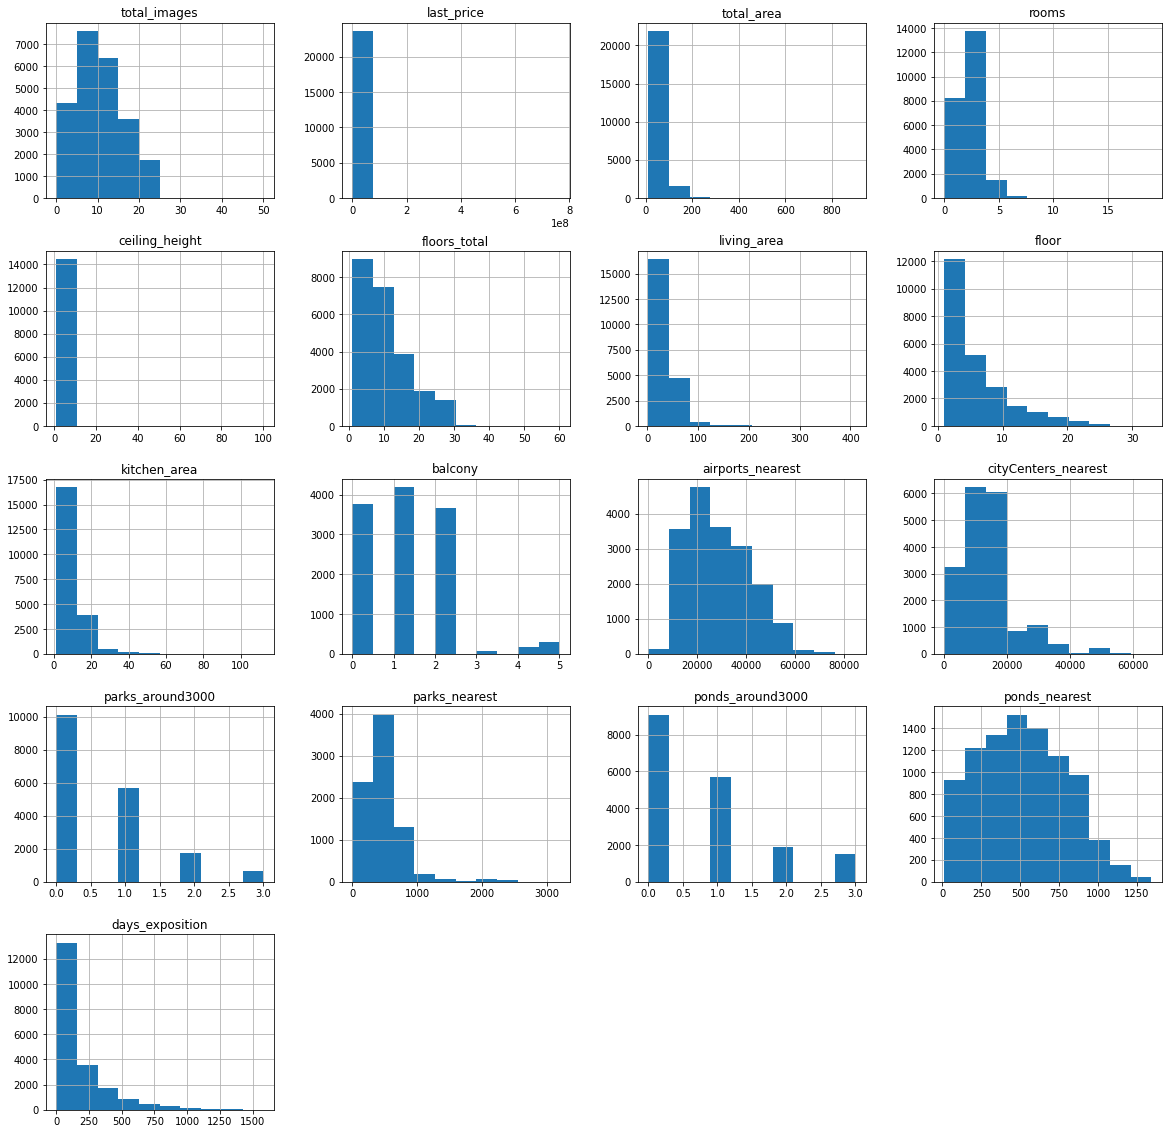

In [5]:
#посмотрим зависимости
data.hist(figsize=(20,20),bins=10);


После ознакомления с данными можно сделать следующие выводы:

В данных о населенном пункте имеются неявные дубликаты.

Нужно разобраться с огромным количеством пропусков.

Тип данных даты лучше исправить, так лучше изменить тип данных в столбце апартаменты, так же как в студии и свободной планировке, так же нужно исправить тип данных параметра количество этажей в доме на целочисленный, но перед изменением типа данных нужно разобраться с пропусками.

В столбцах высота потолков, цена и общая площадь сложно рассмотреть что-что напоминающее нормальное и Пуасновское распределение, эти данные потребуют дополнительного изучения на наличие аномалий.



### Предобработка данных

In [6]:
# меняем тип данных на дата
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
#меняем тип данных на булев тип, перед этим заменим пропуски иначе все отсутствующие значения будут True
data['is_apartment'] = data['is_apartment'].fillna(0).astype('bool')

Рассмотрим неявные дубликаты населенных пунктов

In [7]:
data['locality_name'].sort_values().unique() 

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Судя по всему нужно исправить разницу между е и ё в слове поселок.

In [8]:
data['locality_name'] = data['locality_name'].replace('посёлок', 'поселок', regex=True)
len(data.locality_name.unique())

331

In [9]:
#разбираемся с пропусками
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [10]:
# корреляция
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,0.010532,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,0.026958,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,0.029633,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,0.000399,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.154959,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,-0.026351,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,0.026969,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,-0.013294,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
is_apartment,0.010532,0.026958,0.029633,0.000399,0.154959,-0.026351,0.026969,-0.013294,1.000000,-0.003657,-0.002448,0.049034,0.043119,0.016470,0.003732,0.020767,-0.033410,0.023989,0.003357,0.015262
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,-0.003657,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476


Разделим пропуски на три условные категории: 

1 - те для устранения которых проще удалить строку с пропусками из-за малой потери в данных ( кол-во этажей 86 и  название населенного пункта 49 из 23698 записей)

2 - те для устранения которых не нужны вспомогательные данные и дополнительная обработка (число балконов, апартаменты, высота потолка)

3 - те для устранения которых нужно тиспользовать коррелирующие с ними данные (все остальные данные с пропусками)



In [11]:
#удаление строк с пропущенными данные о кол-ве этажей и населенном пункте
data = data.dropna(subset=['floors_total','locality_name'])
# тут же поменяем тип данных колличества этажей
data['floors_total'] = data['floors_total'].round().astype('int')

Предположим, что отсутствующее значение количества балконов говорит нам о их отсутствии. Так же можно рассудить о типе квартиры в случае апартаментов, скорее всего владельцы обычных квартир просто не отметили данную графу, для сбоя в переносе данных слишком странное исключение. 

In [12]:
#Замена пропусков на 0 
data['balcony'] = data['balcony'].fillna(0)



Судя по диаграмме высоты потолков имеются некоторые выбросы в большую сторону, возможно при переносе данных произошла ошибка. Найдем выбивающиеся значения  меньше 2.5м и больше 10м 

355       25.00
3148      32.00
4643      25.00
4876      27.00
5076      24.00
5246      27.00
5669      26.00
5712       1.20
5807      27.00
6246      25.00
9379      25.00
10773     27.00
11285     25.00
14382     25.00
15061     14.00
16934      1.75
17496     20.00
17857     27.00
18545     25.00
20478     27.00
20507     22.60
21377     27.50
21824     27.00
22309     10.30
22336     32.00
22590      1.00
22869    100.00
22938     27.00
Name: ceiling_height, dtype: float64


<AxesSubplot:>

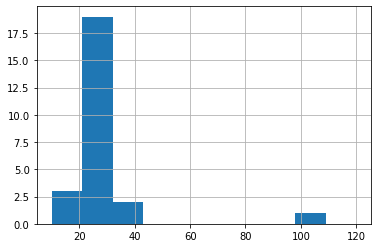

In [13]:
# Рассмотрим аномалии
print(data.query('ceiling_height>10  or ceiling_height<2')['ceiling_height'])
data['ceiling_height'].hist(range=(10,120))


Можно , было предположить, что есть некоторый тип квартир с очень необычными потолками, но такое распределение значений, говорит нам, что это скорее ошибка.

Тогда предположим, что часть этих выбросов получилась искажением данных и изменении порядка на 10, их можно исправить, аномальные же значения (1.2, 1.75, 1, 14, 10.3, 100) предлагаю просто удалить.

Пропуски же заполним медианным значением.

In [14]:
# Исправление 
data.loc[data['ceiling_height'] > 15, 'ceiling_height'] = data.loc[data['ceiling_height'] > 15, 'ceiling_height']/10
data = data.query('ceiling_height != [1.2, 1.75, 1, 14, 10.3, 100]')
data.loc[data["ceiling_height"].isna(), "ceiling_height"] = data['ceiling_height'].median()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23560 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23560 non-null  int64         
 1   last_price            23560 non-null  float64       
 2   total_area            23560 non-null  float64       
 3   first_day_exposition  23560 non-null  datetime64[ns]
 4   rooms                 23560 non-null  int64         
 5   ceiling_height        23560 non-null  float64       
 6   floors_total          23560 non-null  int64         
 7   living_area           21695 non-null  float64       
 8   floor                 23560 non-null  int64         
 9   is_apartment          23560 non-null  bool          
 10  studio                23560 non-null  bool          
 11  open_plan             23560 non-null  bool          
 12  kitchen_area          21339 non-null  float64       
 13  balcony         

Приступим к работе с данными говорящами о площади квартиры, для начала рассмотрим общую площадь и ее аномальные значения.

В этом случае можно сказать, что это похоже на нормальное распределение Пуасона, просто квартиры столь большой площади очень малочисленны, скорее всего такие располагаются в центре города.

Просто при  заполнении пропусков можно будет выделить 2 подкатегории

Минимальное же значение говорит о том что данных выбивающихся в меньшую сторону нет.

12.0


<AxesSubplot:>

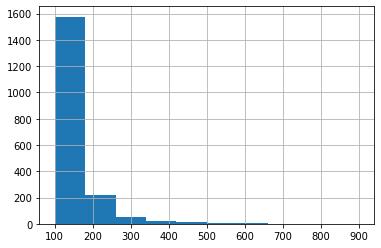

In [15]:
print(data["total_area"].min())
data['total_area'].hist(range=(100,900))

Жилая площади и площадь кухни имеют наибольшую коореляцию с общей сплощадью квартиры, что в принципе логично, заполнять медианными значениями этих площадей в зависимости от общей площади странно.

По этому предлагаю найти меанное значение доли площади занимаемой кухней и жилой площадью.

Так же нужно проверить правильность имеющихся данных, поскольку они взаимосвязанны, общая площадь не может превышать сумарные значения жилой площади и площади кухни.


In [16]:
#проверяем имебщиеся данные 
len(data.loc[(data["total_area"]-data['kitchen_area']-data['living_area']) < 0])

65

Информация о 65 квартирах содержит в себе ошибки о какой либо характеристики площади, поскольку в общей площадью судя по минимальному значению и распределению все нормально, в наблюдаемых ошибочных данных сложно заметить какую либо закономерность говорящую об ошибке, значения не выбиваются из рамок нормальности, просто введены неправильно.
Думаю лучше удалить такие данные для исключения дальнейших проблем при заполнении пропусков и поиска прочих закономерностей.

Используем drop т.к. просто сделать срез где разница больше 0 неправильно, поскольку есть и пропущенные данные которые нам еще неободимо запонить.

In [17]:
#удаление
data = data.drop(labels=data.index[(data["total_area"]-data['kitchen_area']-data['living_area']) < 0])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23495 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23495 non-null  int64         
 1   last_price            23495 non-null  float64       
 2   total_area            23495 non-null  float64       
 3   first_day_exposition  23495 non-null  datetime64[ns]
 4   rooms                 23495 non-null  int64         
 5   ceiling_height        23495 non-null  float64       
 6   floors_total          23495 non-null  int64         
 7   living_area           21630 non-null  float64       
 8   floor                 23495 non-null  int64         
 9   is_apartment          23495 non-null  bool          
 10  studio                23495 non-null  bool          
 11  open_plan             23495 non-null  bool          
 12  kitchen_area          21274 non-null  float64       
 13  balcony         

Теперь можно заполнять пропуски в жилой площади и площади кухни.

In [18]:
#Создадим  фрейм данных со значениями общей площади и доли куханной и жилой площадей 
data['share_liv'] = data['living_area']/data["total_area"]
data['share_k'] = data['kitchen_area']/data["total_area"]
d = data.loc[data['total_area']>100,'share_liv'].median() 
d1 = data.loc[data['total_area']<=100,'share_liv'].median()

f = data.loc[data['total_area']>100,'share_k'].median() 
f1 = data.loc[data['total_area']<=100,'share_k'].median() 

In [19]:

data.loc[(data['total_area']>100) & (data["living_area"].isna()),'living_area'] = \
data.loc[(data['total_area']>100) & (data["living_area"].isna()),'total_area']* \
data.loc[data['total_area']>100,'share_liv'].median()

data.loc[(data['total_area']<=100) & (data["living_area"].isna()),'living_area'] = \
data.loc[(data['total_area']<=100) & (data["living_area"].isna()),'total_area']*\
data.loc[data['total_area']<=100,'share_liv'].median()


data.loc[(data['total_area']>100) & (data["kitchen_area"].isna()),'kitchen_area'] = \
data.loc[(data['total_area']>100) & (data["kitchen_area"].isna()),'total_area']*\
data.loc[data['total_area']>100,'share_k'].median()

data.loc[(data['total_area']<=100) & (data["kitchen_area"].isna()),'kitchen_area'] = \
data.loc[(data['total_area']<=100) & (data["kitchen_area"].isna()),'total_area']*\
data.loc[data['total_area']<=100,'share_k'].median() 

Так же проверим неправильне данные, если таковых немного удалим. 

Удалим столбцы соотношений, что бы еще сильнее не засорять данные.

In [20]:
len(data.loc[(data["total_area"]-data['kitchen_area']-data['living_area']) < 0,['kitchen_area','total_area','living_area']])


55

In [21]:
#удаление
data = data.drop(labels=data.index[(data["total_area"]-data['kitchen_area']-data['living_area']) < 0])
data = data.drop(columns=['share_liv','share_k']) 

Картографические данные не имеют отслеживаемой связи, поэтому оставим эти пропуски нетронутыми.

Остались только пропуски в данных о количестве дней размещения объявления. 

In [22]:

data["days_exposition"].describe()

count    20281.000000
mean       180.962527
std        219.959528
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Судя по разбросу, на доске объявлений нет ограничения на время размещения объявления, следовательно предположу, что в момент сбора данных объявление было еще размещено.

В исходных данных имеется большое количество проблем:
-    Пропуски связанные с невнимательностью или необязательностью владельцев квартир
-    Картографические пропуски справление которых без дополнительных данных невозможно
-    Неточность данных при заполнении данных квартиры, например данные о площади
-    Возможные проблемы с переносом данных повлекшие за собой изменение значений высоты потолков

### Посчитайте и добавьте в таблицу новые столбцы

Добавим следующие столбцы:

-цена одного квадратного метра;-
--день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
--месяц публикации объявления;
--год публикации объявления;
--расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [23]:
data['price_per_meter'] = data['last_price'] / data['total_area']
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['share_liv'] = data['living_area']/data["total_area"]
data['share_k'] = data['kitchen_area']/data["total_area"]
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()

Классификация этажей 

In [24]:
def t_floor(df):
    floor = df['floor']
    max_floor = df['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == max_floor:
        return 'последний'
    elif 1 < floor < max_floor:
        return 'другой'

data['floor_type'] = data.apply(t_floor, axis=1)

### Проведите исследовательский анализ данных

In [25]:
data['total_area'].describe()

count    23440.000000
mean        60.377582
std         35.666454
min         13.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

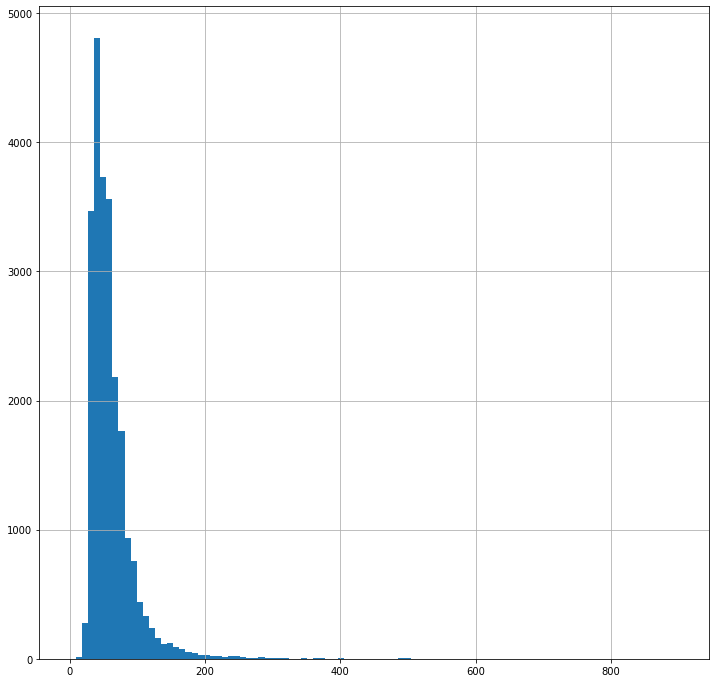

In [26]:
data['total_area'].hist(bins=100, range=(0, 900), figsize=(12, 12))

При увеличении числа корзин картина распределения, все сильнее смещается к нормальному распределению, имеется некоторый хвост в сторону большой площади.

Наличие такого хвоста с 1 стороны вполне закономерно, поскольку мы рассматриваем площадь квартиры, она не может иметь отрицательную площадь.

Но поскольку нужно иследование в целом по рынку лучше оставить для исследовавния квартиры в диапозоне  от 0 до 350, тем более там появляются большие пропуски.

In [27]:
good_data = data.query('total_area < 350')
good_data['total_area'].describe()

count    23399.000000
mean        59.693194
std         31.424386
min         13.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        347.500000
Name: total_area, dtype: float64

<AxesSubplot:>

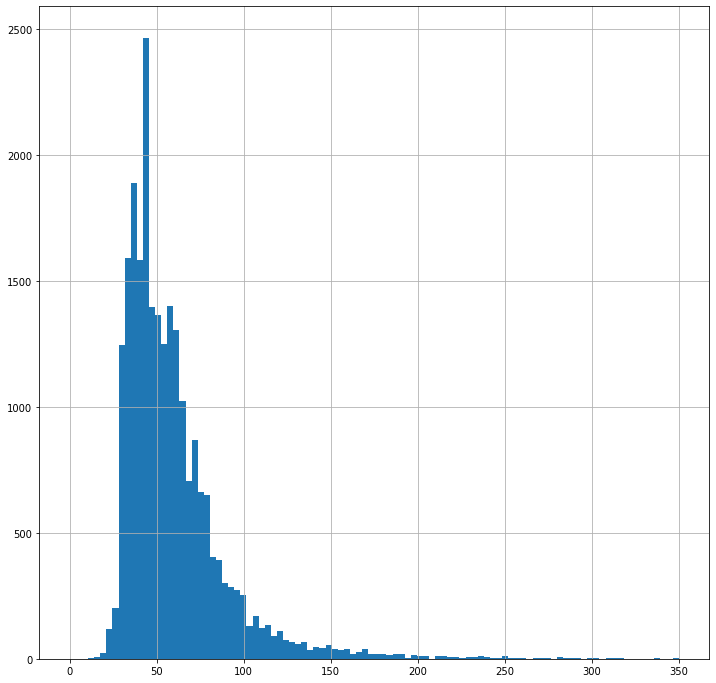

In [28]:
good_data['total_area'].hist(bins=100, range=(0, 350), figsize=(12, 12))

Теперь можно сделать вывод что большинство квартир находится в диапазоне от 30 до 70 квадратных метров.

In [29]:
good_data['living_area'].describe()

count    23399.000000
mean        34.184340
std         20.314165
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        260.000000
Name: living_area, dtype: float64

<AxesSubplot:>

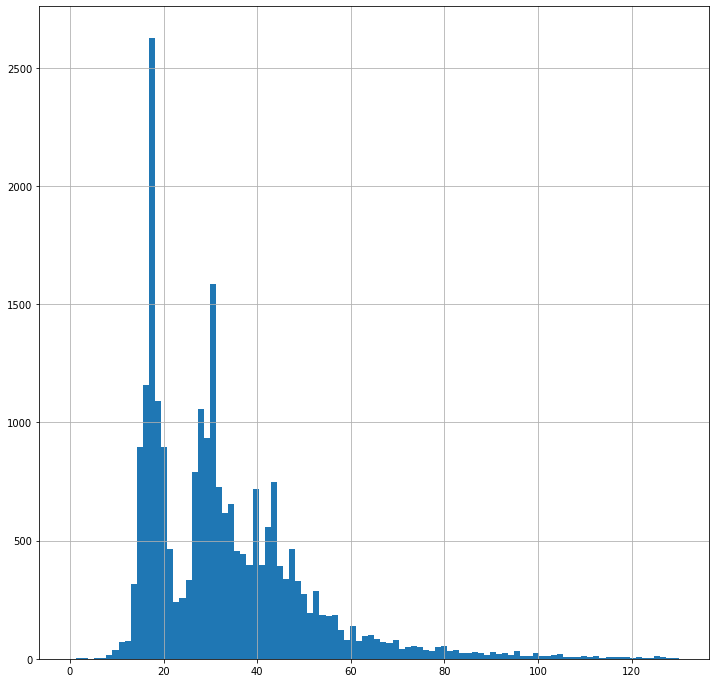

In [30]:
good_data['living_area'].hist(bins=100, range=(0, 130), figsize=(12, 12))

Распределение жилой площади больше похоже на распределение Пуасона, но картина не стабильная проверим связано ли это с типом квартиры(студия,аппартаменты), так же отсечем квартиры с жилой площадью больше 130.

In [31]:
good_data = good_data.query('living_area < 130')

In [32]:
#посмотрим сколько таких квартир
print(len(good_data.loc[good_data['is_apartment'] == True]),len(good_data.loc[good_data['studio'] == True]))

46 131


Нет, это не связано с типом квартиры, поскольку такое колличество не могло внести существенных изменений, можно предположить, что это связано с типовыми жилими комплексами, но таких данных у нас нет.


In [33]:
good_data['kitchen_area'].describe()

count    23234.000000
mean        10.265552
std          5.350885
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max        107.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

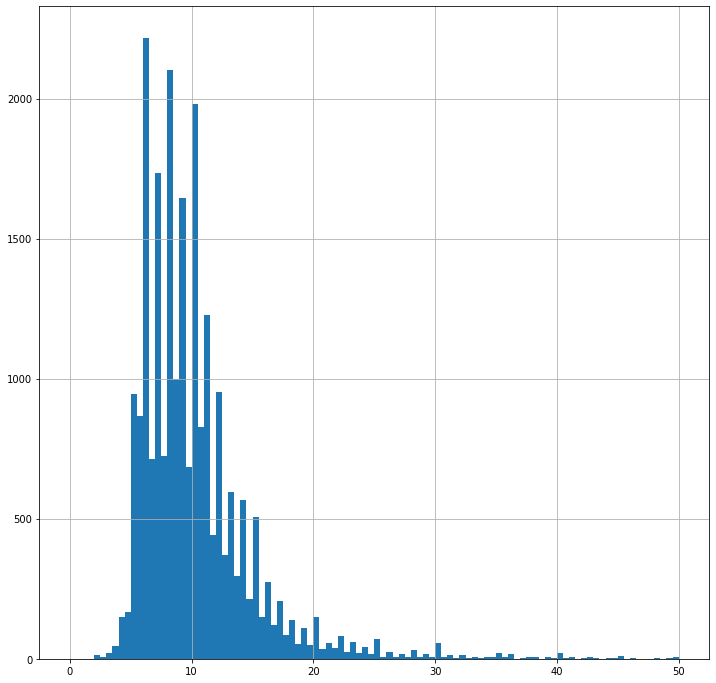

In [34]:
good_data['kitchen_area'].hist(bins=100, range=(0, 50), figsize=(12, 12))

Распределение площади кухни больше похоже на распределение Пуасона. Картина вполне ровная, в большинстве квартир площадь кухни от 5 до 18 метров квадратных. Но хвост начинает прерываться на значениях площади кухни больше 30 кв. метров. 

In [35]:
good_data = good_data.query('kitchen_area < 30')

In [36]:
good_data['rooms'].describe()

count    22925.000000
mean         2.025736
std          0.988081
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

<AxesSubplot:>

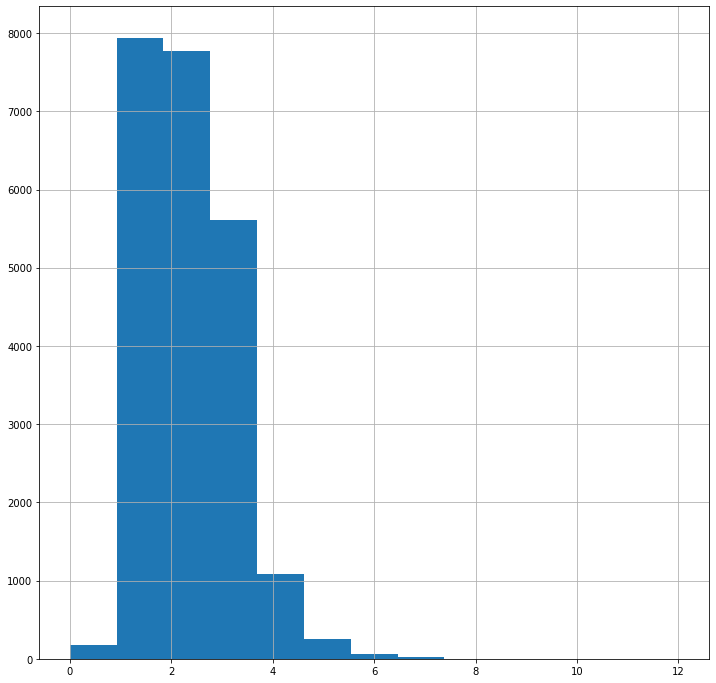

In [37]:
good_data['rooms'].hist(bins=13, range=(0, 12), figsize=(12, 12))


Абсолютное большинство квартир входит в диапазон от 1 до 3 комнат, имеются квартиры с 0 количеством комнат.
Предположим, что это квартиры студии. Квартиры от 7 комнат тоже уберем.

In [38]:
print(len(good_data.loc[(good_data['studio'] == True) & (good_data['rooms'] == 0)]),\
      len(good_data.loc[good_data['rooms'] == 0]),)


122 175


In [39]:
good_data = good_data.query('rooms < 8')

Действительно, большая часть из них это квартиры студии, но не все.

In [40]:
good_data['ceiling_height'].describe()

count    22922.000000
mean         2.690260
std          0.222105
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

In [41]:
good_data['floors_total'].describe()

count    22922.000000
mean        10.710976
std          6.598002
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

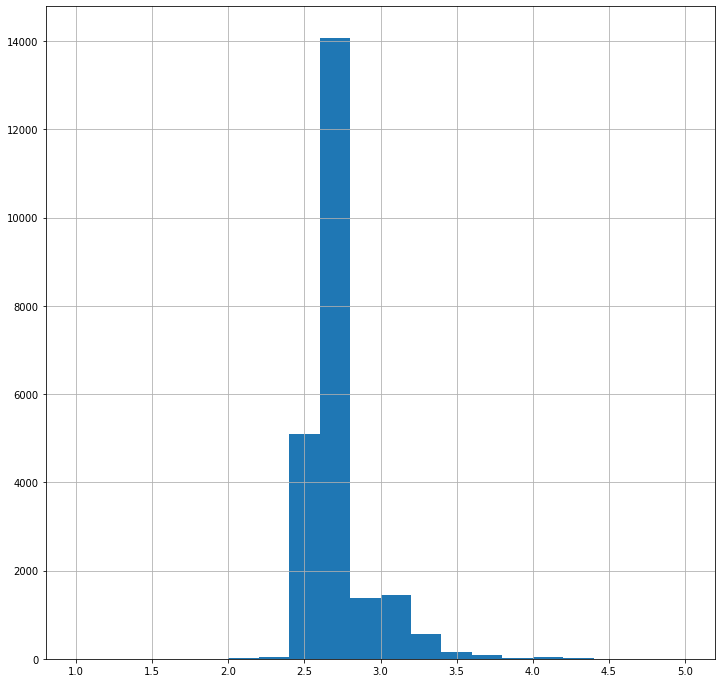

In [42]:
good_data['ceiling_height'].hist(bins=20, range=(1, 5), figsize=(12, 12))


В большинстве высота потолков колеблется от 2.5м до 2.7м, есть небольшое количество квартир с низкими потолками, и с более высокими. 


In [43]:
good_data['floor'].describe()

count    22922.000000
mean         5.875404
std          4.874482
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

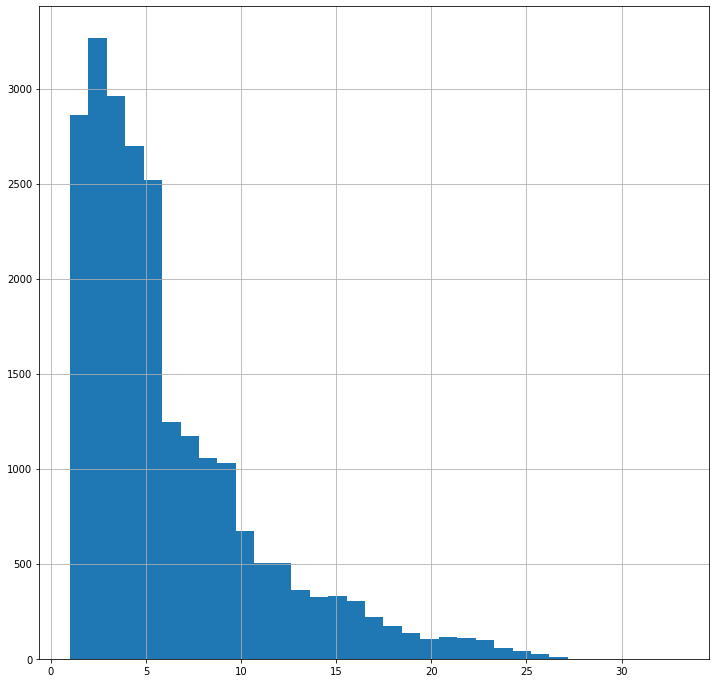

In [44]:
good_data['floor'].hist(bins=33, range=(1, 33), figsize=(12, 12))

Стандартное распределение Пуасона. Большинство квартир располагается на 1-6 этажах.

In [45]:
good_data['floor_type'].describe()

count      22922
unique         3
top       другой
freq       16868
Name: floor_type, dtype: object

<AxesSubplot:>

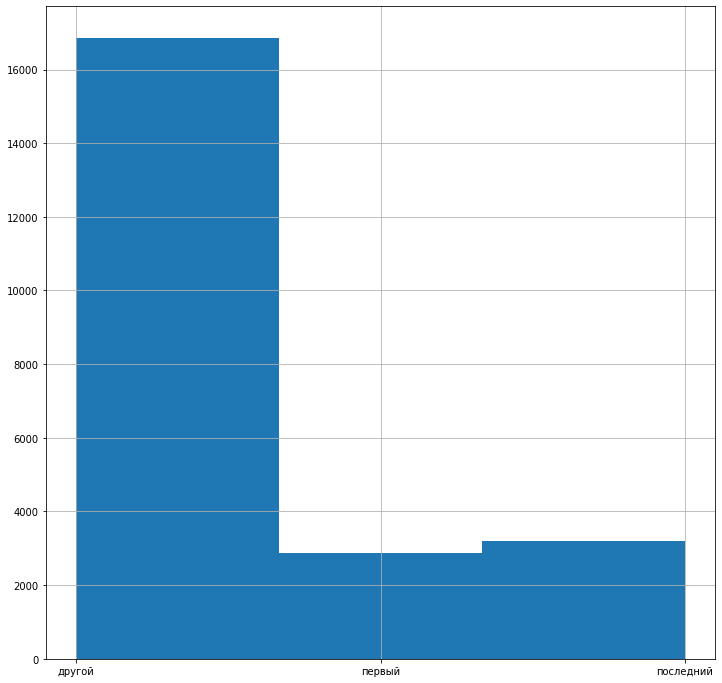

In [46]:
good_data['floor_type'].hist(bins=3,figsize=(12, 12))


Т.к. многоэтажная застройка преобладает вполне закономерно, что большиство квартир находится не на 1 и последнем этажах.

Квартир на 1 этаже продается меньше чем на последнем, скорее всего это связано с тем, что часто на 1 этаже в целом меньше квартир.

In [47]:
good_data['floors_total'].describe()

count    22922.000000
mean        10.710976
std          6.598002
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

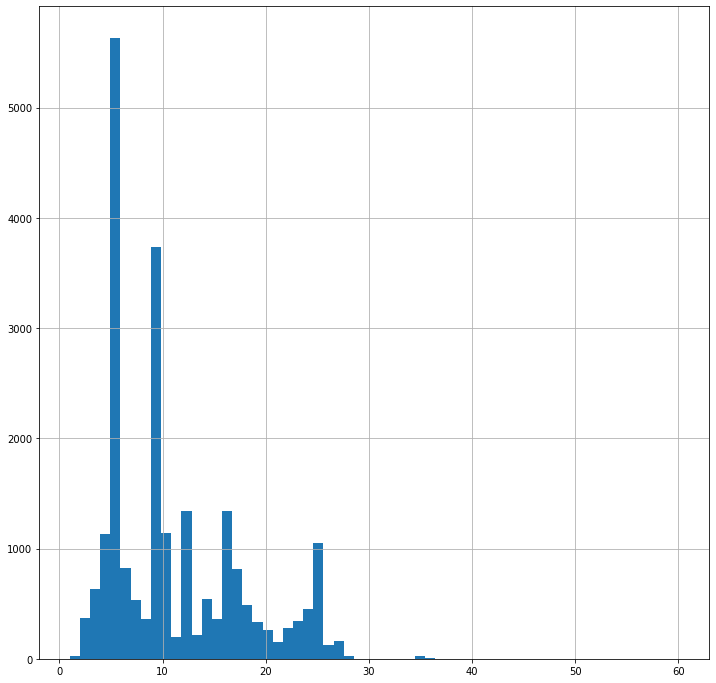

In [48]:
good_data['floors_total'].hist(bins=60, range=(1, 60), figsize=(12, 12))


Этажи больше 30 выглядят вбросами, да и данных от таких зданиях я в интернете не нашел.

А вот потенциально элитные квартиры располагаются в низкой застройке, что уже напоминает правду.


In [49]:
good_data = good_data.query('floors_total < 30')
good_data['floors_total'].describe()

count    22892.000000
mean        10.677311
std          6.533526
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

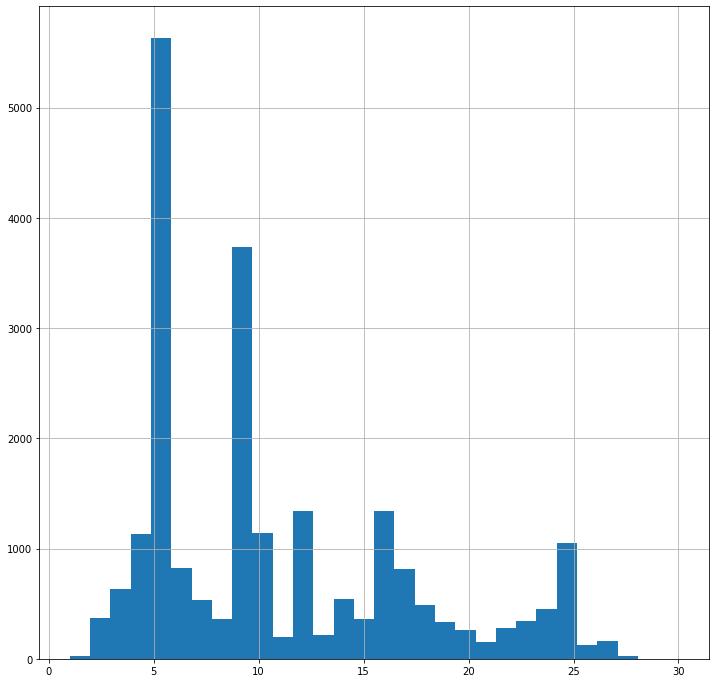

In [50]:
good_data['floors_total'].hist(bins=30, range=(1, 30), figsize=(12, 12))

Из-за всплесков не прослеживается какой либо картины распределения, но это нормально т.к. существует типовая завстройка по 5,9,12,17 этажей.

In [51]:
good_data['cityCenters_nearest'].describe()

count    17449.000000
mean     14360.935756
std       8599.098892
min        181.000000
25%       9567.000000
50%      13205.000000
75%      16364.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

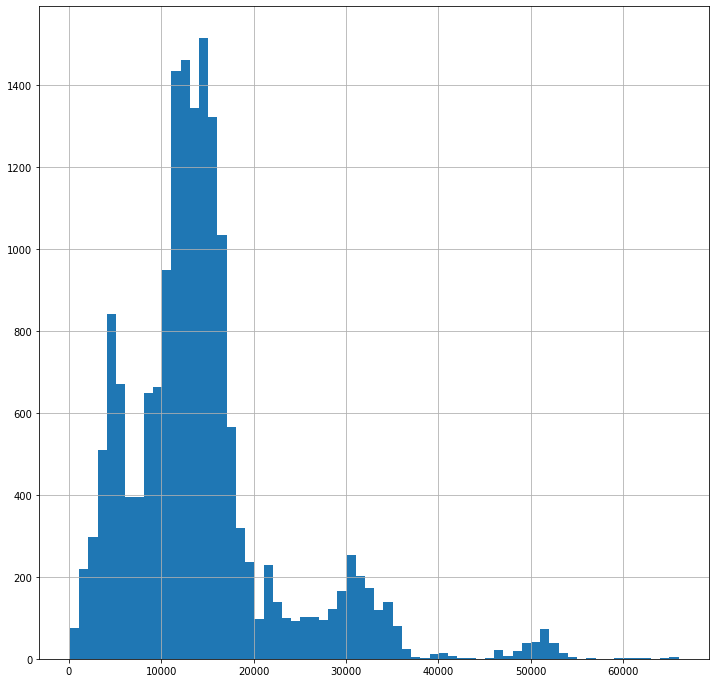

In [52]:
good_data['cityCenters_nearest'].hist(bins=66, range=(100, 66000), figsize=(12, 12))

Имеется несколько пиков на растоянии 7, 12-15, 21-23,30-33 и 53 км. Такое распределение можно счесть нормальным, из-за неравномерной застройки городов. Теорию можно проверить создав сводную таблицу медианных значений по населенным пунктам. (Т.к. всплески вполне равномерны и по отдельности напоминают нормальное распределение.)

In [53]:
pivot_City_nearest = good_data.pivot_table(index = "locality_name", values = "cityCenters_nearest", aggfunc=['median'])
pivot_City_nearest.columns=["cityCenters_nearest"]
pivot_City_nearest.sort_values("cityCenters_nearest")

,cityCenters_nearest
locality_name,
Санкт-Петербург,12331.0
поселок Парголово,19318.0
поселок Стрельна,23506.0
поселок Шушары,24213.0
поселок Левашово,25727.0
поселок Песочный,26099.5
поселок Петро-Славянка,27165.0
поселок Александровская,27468.0
поселок Металлострой,27602.0


Судя по всему за первые два всплеска отвечает Санкт_Петербург, следующие населенные пункты расположены как раз близко к границам всплесков.

In [54]:
good_data['airports_nearest'].describe()

count    17429.000000
mean     28847.229904
std      12724.089842
min          0.000000
25%      18450.000000
50%      26880.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

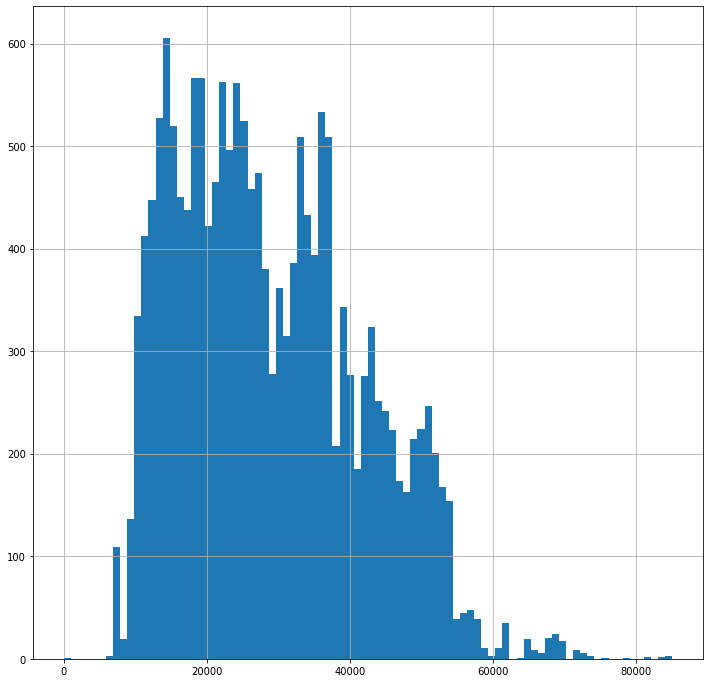

In [55]:
good_data['airports_nearest'].hist(bins=86, range=(0, 85000), figsize=(12, 12))

Примерно похожая ситуация, но в данном случае абсолютное большинство квартир от 10 до 53 км. А вот квартиры на растоянии 0 это какая то ошибка.

In [56]:
good_data=good_data.drop(labels=good_data.index[good_data['airports_nearest'] <5])
good_data['parks_nearest'].describe()

count    7672.000000
mean      492.736184
std       340.362324
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

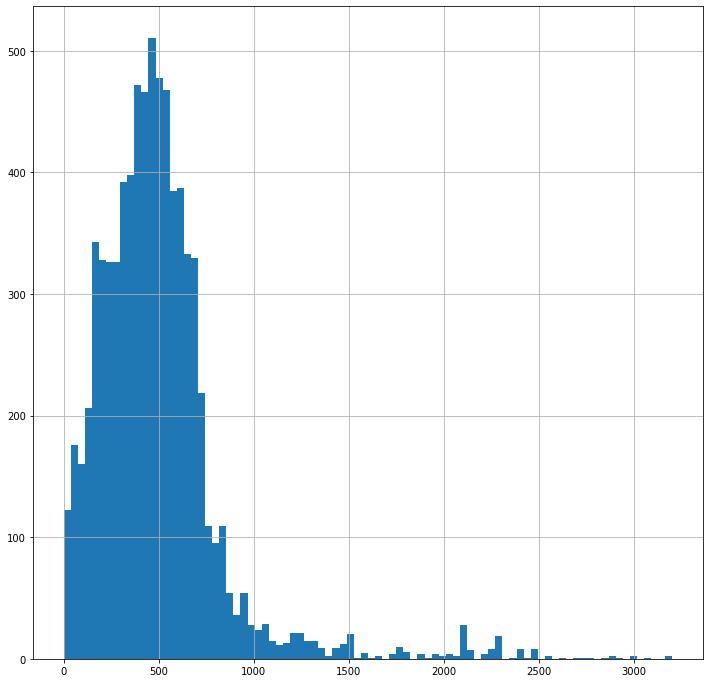

In [57]:
good_data['parks_nearest'].hist(bins=86, range=(0, 3200), figsize=(12, 12))


Распределение напоминает нормальное с длинным хвостом от 1км до 3км. Данные выглядят вполне естественно.

In [58]:
good_data['month'].describe()

count    22891.000000
mean         6.407846
std          3.493102
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

<AxesSubplot:>

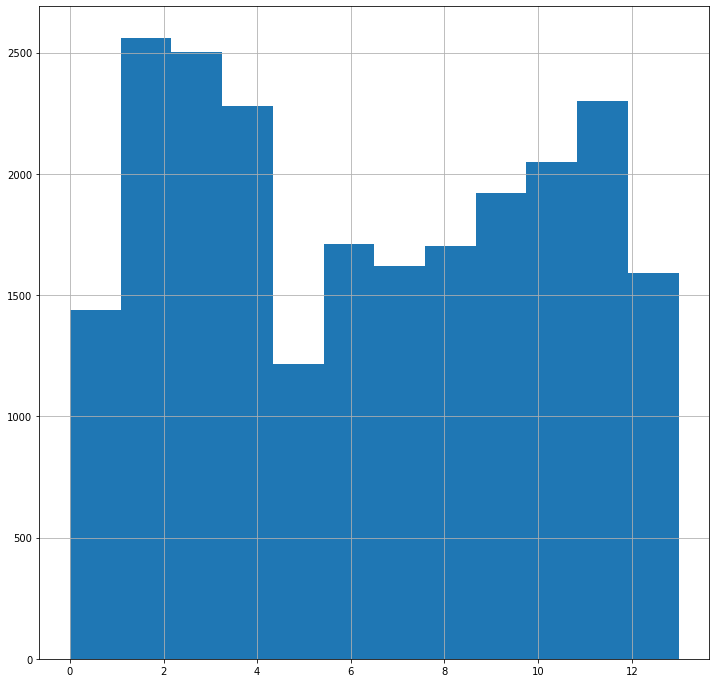

In [59]:
good_data['month'].hist(bins=12, range=(0, 13), figsize=(12, 12))


В целом относительно года объявление распределены равномерно(медиана 6месяц), однако по гистграмме видно, что основная деятельность по продажам ведется в с февраля по апрель и осенью.

count    22891.000000
mean         2.568651
std          1.788865
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

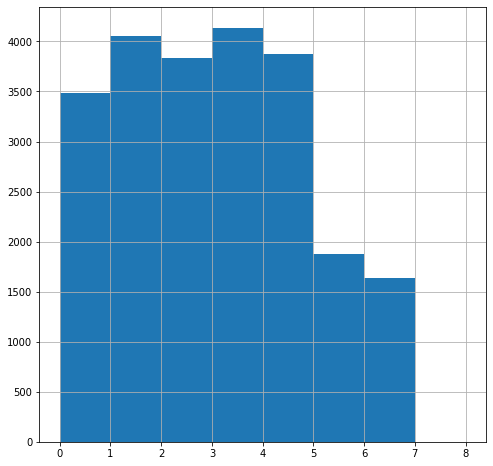

In [60]:
good_data['weekday'].hist(bins=8, range=(0, 8), figsize=(8, 8))
good_data['weekday'].describe()

На выходных активность заметно снижается, в будние дни она равномерна, после небольшого разгона в понедельник.

Рассмотрим как долго продавались квартиры. Границы диапозона мы рассматривали ранее, но для удобства восприятия повторим.

In [61]:
good_data['days_exposition'].describe()

count    19870.000000
mean       178.737292
std        217.214154
min          1.000000
25%         44.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

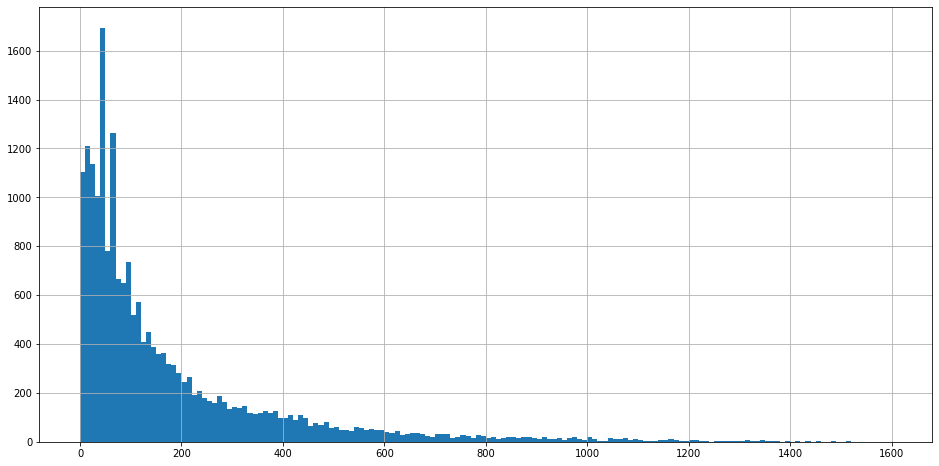

In [62]:
good_data['days_exposition'].hist(bins=160, range=(0, 1600), figsize=(16, 8))

Если рассмотреть гистограму распределение практически по Гаусу, несчитая 4 всплесков. Большая часть квартир продает за 3-4 месяца, имеется длинный хвост вплот до 5 лет. Но данная гистограмма разбивает нашу теорию о пропусках, поскольку 10000 объявлений возникнут как раз на этом хвосте. Можно предположить, что там указана не рентабельная цена. 

Думаю будет уместным убрать квартиры которые "висят" больше 800 дней.

Среднее значение и медиана сильно разняться (183 и 96 дней), из-за наличия приличного хвоста в большую сторону.
Из проведенного аналитза можно сделать вывод, что если квартира не была продана в течении полугода вероятность ее продажи кратно падает.

In [63]:
good_data=good_data.drop(labels=good_data.index[good_data['days_exposition'] > 800])

In [64]:
good_data['days_exposition'].describe()

count    19321.000000
mean       154.829564
std        164.388154
min          1.000000
25%         43.000000
50%         90.000000
75%        210.000000
max        800.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

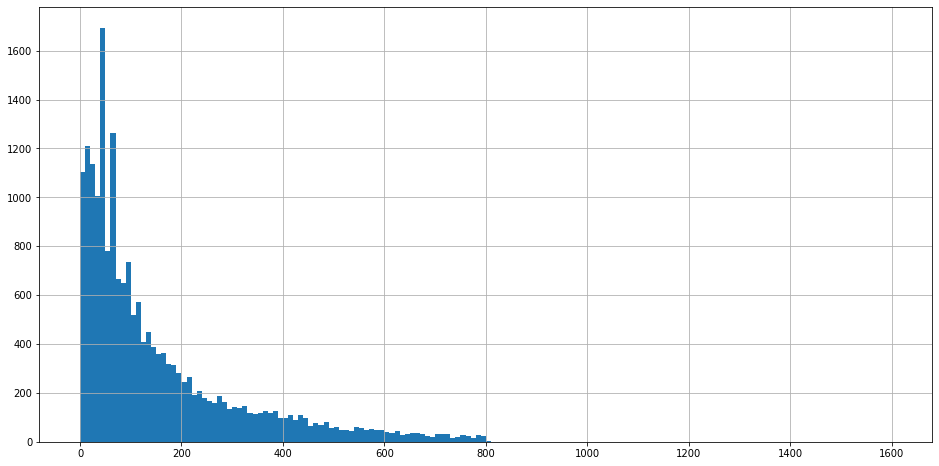

In [65]:
good_data['days_exposition'].hist(bins=160, range=(0, 1600), figsize=(16, 8))

Сильно смущает два пика до 100 дней, объяснить это географическим расположением, или типовой застройкой сложно, можно преположить что это вво домов в эксплуатацию, т.к. не сказано, что рассматривается рынок вторичного жилья. Но я бы рассмотрел более подробно. 

<AxesSubplot:>

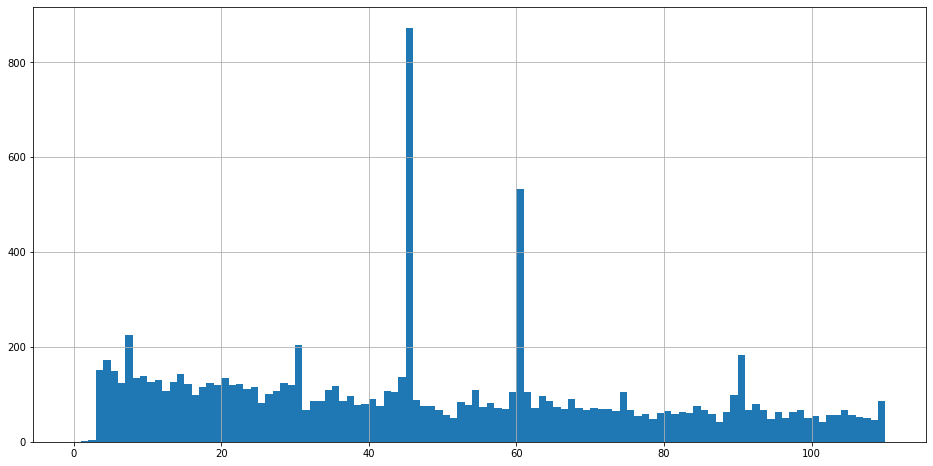

In [66]:
good_data['days_exposition'].hist(bins=110, range=(0, 110), figsize=(16, 8))

Два больших пика на 45 и 60 день, однако удалять такой объем данных может быть рискованно, оставим. 

В итоге можно сказать, быстро проданной квартирой может считаться квартира проданная в срок до 43 дней, а вот квартира продаваемая больше года должна вызвать опасения, т.к. это необычно долго.

Перед тем как проследить зависимость цены квадратного метра от других параметров давайте рассмотрим саму стоимость квадратного метра.

In [67]:
good_data["price_per_meter" ].describe()

count     22342.000000
mean      97182.460553
std       41426.746813
min        7962.962963
25%       76088.399129
50%       94444.444444
75%      112960.174029
max      995983.935743
Name: price_per_meter, dtype: float64

Для удобства восприятия создадим параметр цены в тыс. р. и я думаю будет уместо округлить.

In [68]:
good_data["price_per_meter_th"] = good_data["price_per_meter"]/1000
good_data["price_per_meter_th"] = good_data["price_per_meter_th"].round()

In [69]:
good_data["price_per_meter_th" ].describe()

count    22342.000000
mean        97.181855
std         41.427187
min          8.000000
25%         76.000000
50%         94.000000
75%        113.000000
max        996.000000
Name: price_per_meter_th, dtype: float64

<AxesSubplot:>

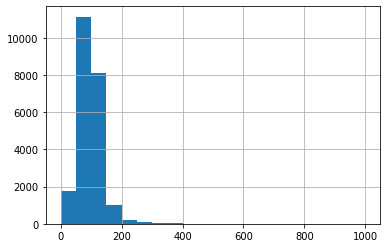

In [70]:
good_data["price_per_meter_th"].hist( bins=20,range=(0,1000))

После 300 т.р. значения исчезают рассмотрим подробнее. 

<AxesSubplot:>

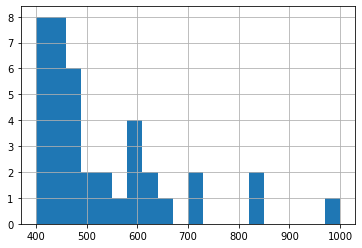

In [71]:
good_data["price_per_meter_th"].hist( bins=20,range=(400,1000))

Думаю можно убрать выпадающие значения больше 700т.р.

In [72]:
good_data = good_data.query('price_per_meter_th < 700')

Рассмотрим зависимость медианной цены квартиры в зависимости от различных параметров.

In [73]:
good_data["last_price" ].describe()

count    2.233700e+04
mean     5.774623e+06
std      5.007535e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      1.244800e+08
Name: last_price, dtype: float64

Так же для удобства переведем в т.р.

In [74]:
good_data["last_price"] = good_data["last_price"]/1000
good_data["last_price_th"] = good_data["last_price"].round()
good_data["last_price_th" ].describe()

count     22337.000000
mean       5774.623047
std        5007.536224
min         430.000000
25%        3400.000000
50%        4550.000000
75%        6500.000000
max      124480.000000
Name: last_price_th, dtype: float64

<AxesSubplot:>

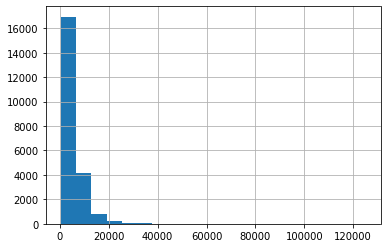

In [75]:
good_data["last_price_th"].hist( bins=20,range=(400,125000))

<AxesSubplot:>

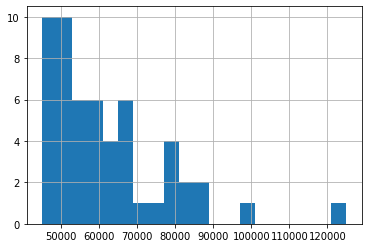

In [76]:
good_data["last_price_th"].hist( bins=20,range=(45000,125000))

Думаю можно не учитывать квартиру стоилостью больше 90000 т.р.

In [77]:
good_data = good_data.query('last_price_th < 90000')

<AxesSubplot:xlabel='rooms'>

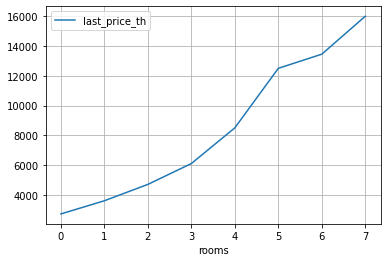

In [78]:
pivot_rooms = good_data.pivot_table(index = "rooms", values = "last_price_th", aggfunc=('median'))
pivot_rooms.plot(grid=True)

In [79]:
good_data["rooms"].corr(good_data['last_price_th'])

0.443585893722142

Даже по графику и корреляции можно сказать, что цена зависит от количества комнат.

<AxesSubplot:xlabel='floor_type'>

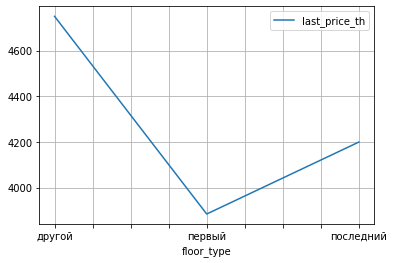

In [80]:
pivot_floor_type = good_data.pivot_table(index = "floor_type", values = "last_price_th", aggfunc=('median'))
pivot_floor_type.plot(grid=True)

Люди предпочитают не брать квартиры на первом и последних этажах.

<AxesSubplot:xlabel='weekday'>

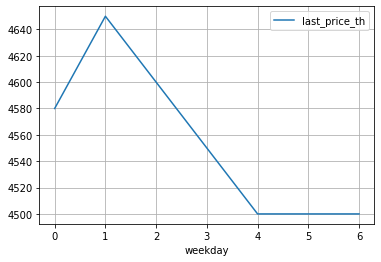

In [81]:
pivot_weekday = good_data.pivot_table(index = "weekday", values = "last_price_th", aggfunc=('median'))
pivot_weekday.plot(grid=True)

Наиболее дорогие квартиры обычно выставляются в начале недели.

<AxesSubplot:xlabel='month'>

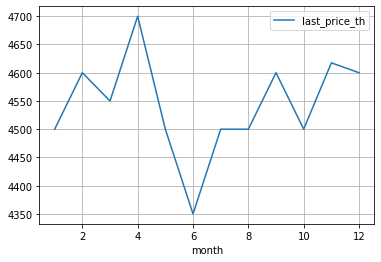

In [82]:
pivot_month = good_data.pivot_table(index = "month", values = "last_price_th", aggfunc=('median'))
pivot_month.plot(grid=True)

В феврале, апреле, сентябре и ноябре выставлялись наиболее дорогие квартиры, а вот к началу лета цена падала.

<AxesSubplot:xlabel='year'>

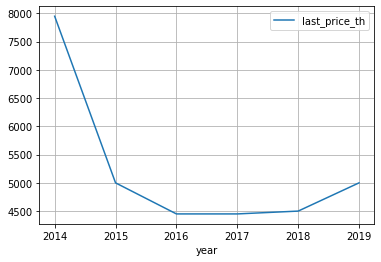

In [83]:
pivot_year = good_data.pivot_table(index = "year", values = "last_price_th", aggfunc=('median'))
pivot_year.plot(grid=True)

Странное снижение от 2014 к 2015 году, потом идет равномерный рост цены.

<AxesSubplot:xlabel='year'>

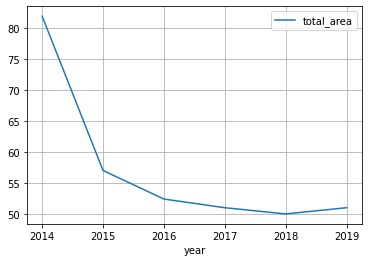

In [84]:
pivot_area = good_data.pivot_table(index = "year", values = "total_area", aggfunc=('median'))
pivot_area.plot(grid=True)

Как оказалось, падение связано не со стоимостью, а с общем снижением площади продаваемых квартир.

<AxesSubplot:xlabel='total_area'>

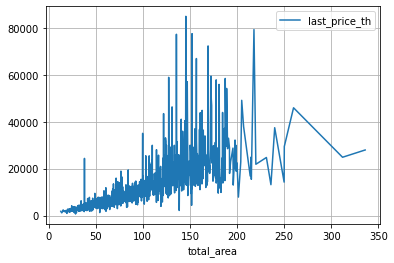

In [85]:
pivot_total_area = good_data.pivot_table(index = "total_area", values = "last_price_th", aggfunc=('median'))
pivot_total_area.plot(grid=True)

Такой график для характерист площади лучше не использовать.

<AxesSubplot:xlabel='total_area', ylabel='last_price_th'>

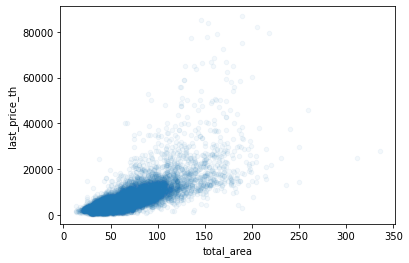

In [86]:
good_data.plot(kind = 'scatter', x = 'total_area', y = 'last_price_th', alpha = 0.05)

<AxesSubplot:xlabel='total_area', ylabel='last_price_th'>

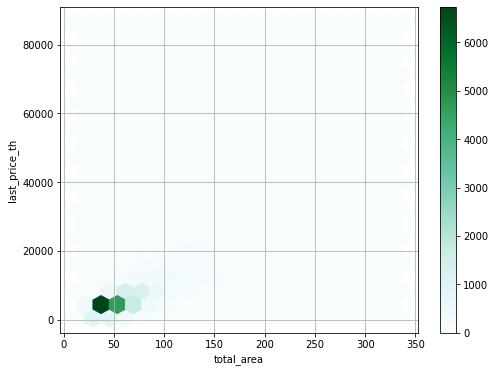

In [87]:
good_data.plot(x='total_area', y='last_price_th', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

In [88]:
good_data["total_area"].corr(good_data['last_price_th'])

0.7310402200476261

Хорошо прослеживается зависимость цены, от общей площади.

0.6449793277095756

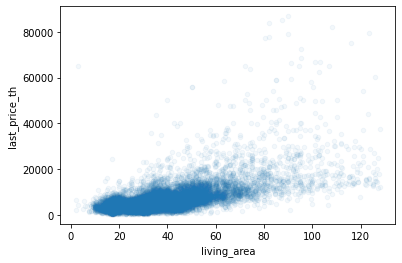

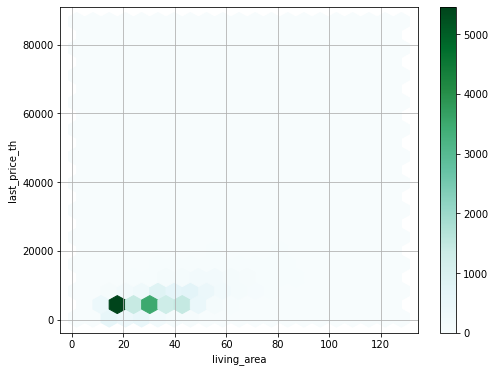

In [89]:
good_data.plot(kind = 'scatter', x = 'living_area', y = 'last_price_th', alpha = 0.05)
good_data.plot(x='living_area', y='last_price_th', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
good_data["living_area"].corr(good_data['last_price_th'])

Вот зависимость от жилой площади постепенно снижается.

0.5318712606719456

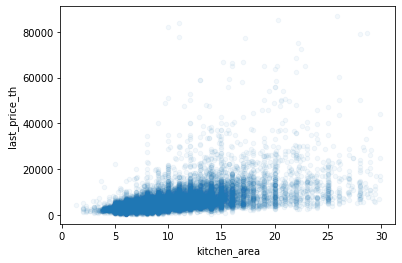

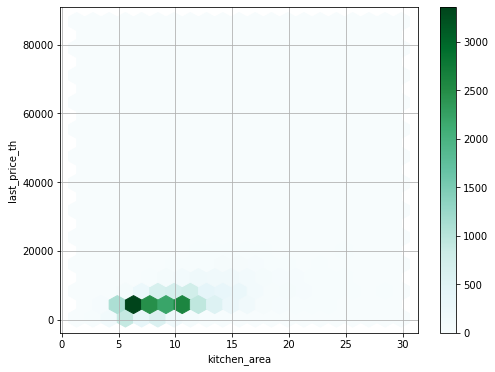

In [90]:
good_data.plot(kind = 'scatter', x = 'kitchen_area', y = 'last_price_th', alpha = 0.05)
good_data.plot(x='kitchen_area', y='last_price_th', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
good_data["kitchen_area"].corr(good_data['last_price_th'])

Связь  прослеживается с площадью кухни.

In [91]:
pivot_cities = good_data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['mean', 'count'])
pivot_cities.columns = ['mean', 'count']
pivot_cities = pivot_cities.sort_values('count', ascending=False)
pivot_cities.head(10)

,mean,count
locality_name,,
Санкт-Петербург,111799.237330,14670
поселок Мурино,85613.624001,528
поселок Шушары,78546.162239,429
Всеволожск,68526.522996,380
Пушкин,102307.677563,344
Колпино,75332.198934,332
поселок Парголово,90077.247144,322
Гатчина,68725.829859,293
деревня Кудрово,92646.245389,287


In [92]:
pivot_cities = pivot_cities.query("count >=226")

In [93]:
pivot_cities[pivot_cities["mean"] ==pivot_cities["mean"].min()]

,mean,count
locality_name,,
Выборг,57935.250731,226


In [94]:
pivot_cities[pivot_cities["mean"] ==pivot_cities["mean"].max()]

,mean,count
locality_name,,
Санкт-Петербург,111799.23733,14670


,price_per_meter_th
cityCenters_nearest_km,
0.0,138.5
1.0,121.5
2.0,119.0
3.0,108.0
4.0,117.0
5.0,125.0
6.0,129.0
7.0,124.0
8.0,121.0


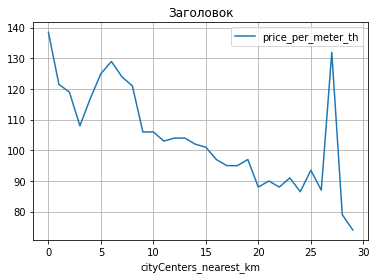

In [95]:
spb_pivot = good_data[good_data["locality_name"] == "Санкт-Петербург"]\
.pivot_table(index='cityCenters_nearest_km', values='price_per_meter_th', aggfunc=('median'))
spb_pivot.plot(grid=True, title = 'Заголовок');
spb_pivot

Сильно смущает скачек в районе 27км, рассмотрим подробнее.

In [96]:
good_data[(good_data["locality_name"] == "Санкт-Петербург")&(good_data['cityCenters_nearest_km']==27)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_per_meter,weekday,month,year,share_liv,share_k,cityCenters_nearest_km,floor_type,price_per_meter_th,last_price_th
748,13,14350.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,193918.918919,1,11,2017,0.405405,0.337838,27.0,другой,194.0,14350.0
5961,6,2250.0,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,70312.500000,1,2,2018,0.515625,0.218750,27.0,последний,70.0,2250.0


Да там маленькая выборка в целом, так еще и одна квартира очень дорогая, по иным параметрам счесть эти данные неправильными нельзя.

По удалению от центра стоимость квартиры постепенно снижается, не учитывая внезапного скачка в районе 27км.

### Общий вывод

Наиболее распрастраненные параметры квартиры:
-    Площадь 30-70 кв.м.
-    Площадь кухни 5-30 кв.м.
-    1-3 комнаты
-    Площадь 30-70 кв.м.
-    Располагается со 2 по 6 этажи
-    Высота потолков 2,5-2,7 метра
-    10-20 км до центра города
-    До ближайшего парка менее 1 км
-    Продается в течении 6 месяцев

Основными факторами влияющими на цену квартир являются
-    Площадь кухни
-    Расположение не на первом и последним этажах
-    Расстояние от центра города
-    Количество комнат (3х комнатные самые дешевые), от 6 комнат цена резко начинает расти